# Face Recognition library 활용한 얼굴인식

In [3]:
import face_recognition
import cv2
import numpy as np

video_capture = cv2.VideoCapture(0)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("images\\SHIN.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("images\\biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "SHIN",
    "Joe Biden"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

# 결과 이미지

SHIN은 학습에 이용된 이미지가 있지만 휴대폰에 있는 인물은 학습에 이용된 이미지가 없어 Unknown으로 표시된다.

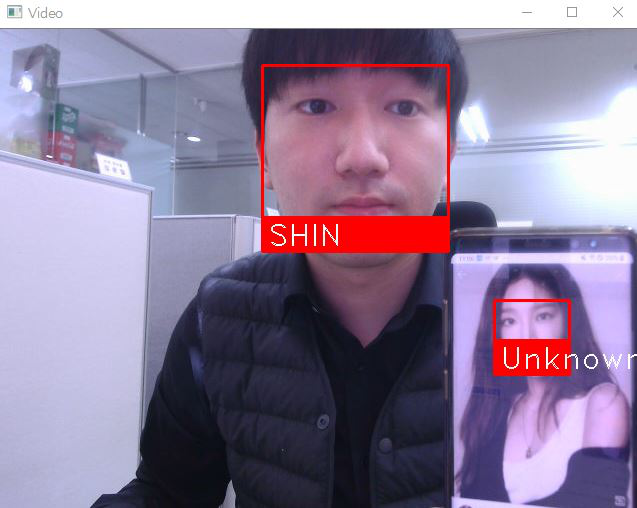

In [14]:
from PIL import Image
result = Image.open("image1.jpg")
result